# <span style="color:#404b69"> <center> DSIM, Assignment 4 - AA 2020/2021 </center>

> <span style="color:#ec524b">**Studente**:</span> Campironi Matteo
>
> <span style="color:#ec524b">**Matricola**:</span> 801850

Implement a neural network to classify the MNIST and CIFAR10 datasets. Adhere to the following architecture:

- Explicit input layer
- Convolution (2D) with 32 3×3 filters
- ReLU
- Max pooling (2D) with a 2×2 filter
- Flattening
- Fully-connected mapping to 128 dimensions
- ReLU
- Fully-connected mapping to the final problem size

### <span style="color:#404b69"> Importo le librerie

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def modelPlots(hist):
    fig = plt.figure(figsize=(20,5))

    fig.add_subplot(1,2,1)
    plt.plot(hist.history['accuracy'], c='#f5b461')
    plt.plot(hist.history['val_accuracy'], c='#9ad3bc')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    fig.add_subplot(1,2,2)
    plt.plot(hist.history['loss'], c='#f3eac2')
    plt.plot(hist.history['val_loss'], c='#ec524b')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [3]:
def plotData(x_train, y_train):
    ind_digit = [np.where(y_train==i)[0][0] for i in np.unique(y_train)]; n = 1
    fig = plt.figure(figsize=(25,10))
    for ind in ind_digit:
        fig.add_subplot(1,10,n)
        plt.imshow(x_train[ind], cmap=plt.cm.Greys)
        n = n+1 
    plt.show()

# <span style="color:#f5b461">1. MNIST Dataset

Per prima cosa carichiamo il dataset e visualizziamone alcuni elementi:

In [4]:
# carico dataset
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

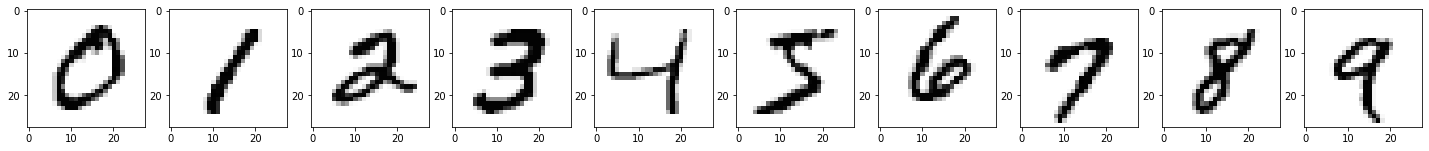

In [5]:
plotData(x_train, y_train)

In [6]:
print('Dimensioni del training set:', x_train.shape)
print('Dimensioni del test set:', x_test.shape)

Dimensioni del training set: (60000, 28, 28)
Dimensioni del test set: (10000, 28, 28)


Il dataset contiene immagini di cifre da 0 a 9, ognuna di dimensioni 28x28 e con un solo canale colore. 

Bisogna ora apportare delle piccole modifiche al dataset prima di poter allenare il modello. Prima di tutto, per questione di generalizzazione, vogliamo che sia esplicita la dimensione del canale, quindi la inseriamo manualmente:

In [7]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)

(60000, 28, 28, 1)


Inoltre vanno riscalati i valori nel range tra 0 e 1:

In [8]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

Infine va effettuato un one-hot encoding delle labels:

In [9]:
num_classes = 10
yc_train = keras.utils.to_categorical(y_train, num_classes)
yc_test = keras.utils.to_categorical(y_test, num_classes)

Creiamo ora il modello con l'architettura richiesta:

In [10]:
modelMNIST = keras.Sequential()
modelMNIST.add(keras.Input((28,28,1)))
modelMNIST.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
modelMNIST.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelMNIST.add(keras.layers.Flatten())
modelMNIST.add(keras.layers.Dense(128, activation='relu'))
modelMNIST.add(keras.layers.Dense(num_classes, activation='softmax'))

In [11]:
modelMNIST.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


Utilizzeremo come funzione di loss la categorical crossentropy e come ottimizzatore adam. Inoltre fissiamo la batch size a 128 e il numero di epoche a 20. 

In [12]:
modelMNIST.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [13]:
historyMNIST = modelMNIST.fit(x_train, yc_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, yc_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2238 - accuracy: 0.9370 - val_loss: 0.0869 - val_accuracy: 0.9742
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0717 - accuracy: 0.9792 - val_loss: 0.0572 - val_accuracy: 0.9807
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0452 - val_accuracy: 0.9848
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0439 - val_accuracy: 0.9849
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.0421 - val_accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 0.0401 - val_accuracy: 0.9864
Epoch 

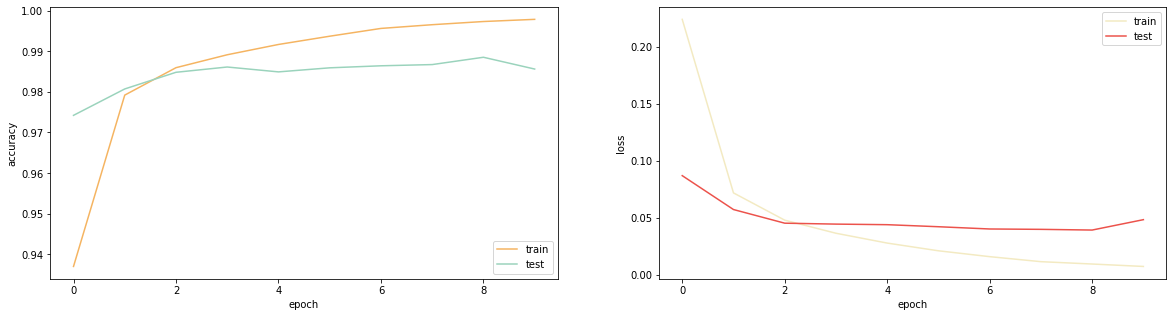

In [14]:
modelPlots(historyMNIST)

In [15]:
yc_pred = modelMNIST.predict(x_test)
y_pred = np.argmax(yc_pred, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



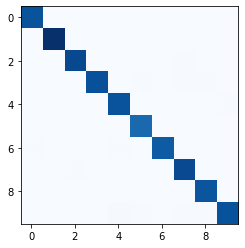

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues); plt.show()

Il modello è perfettamente in grado di riconoscere le varie cifre con un elevata accuratezza e non presenta chiari segni di overfitting.

# <span style="color:#f5b461"> 2. CIFAR-10 Dataset

Carichiamo e visualizziamo il dataset CIFAR-10 come fatto precedentemente per quello MNIST:

In [17]:
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

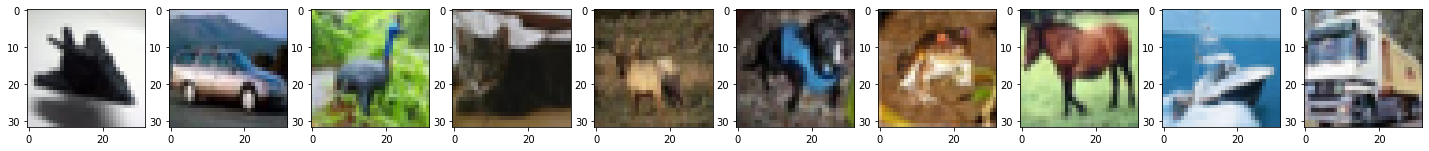

In [18]:
plotData(x_train, y_train)

In [19]:
print('Dimensioni del training set:', x_train.shape)
print('Dimensioni del test set:', x_test.shape)

Dimensioni del training set: (50000, 32, 32, 3)
Dimensioni del test set: (10000, 32, 32, 3)


Questo dataset consiste di 60000 immagini a colori di dimensione 32x32, divise in 10 classi:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

Questa volta abbiamo già esplicita la dimensione rigurdante i canali, quindi ci limitiamo a riscalare nell'intervallo [0,1] e effettuare la one-hot encoding delle labels:

In [20]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [21]:
num_classes = 10
yc_train = keras.utils.to_categorical(y_train, num_classes)
yc_test = keras.utils.to_categorical(y_test, num_classes)

Creiamo ora il modello con l'architettura richiesta:

In [22]:
modelCIFAR = keras.Sequential()
modelCIFAR.add(keras.Input((32,32,3)))
modelCIFAR.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
modelCIFAR.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelCIFAR.add(keras.layers.Flatten())
modelCIFAR.add(keras.layers.Dense(128, activation='relu'))
modelCIFAR.add(keras.layers.Dense(num_classes, activation='softmax'))

In [23]:
modelCIFAR.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
_________________________________________________________________


Utilizzeremo come funzione di loss la categorical crossentropy e come ottimizzatore adam. Inoltre fissiamo la batch size a 128 e il numero di epoche a 20. 

In [24]:
modelCIFAR.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [25]:
historyCIFAR = modelCIFAR.fit(x_train, yc_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, yc_test))

Epoch 1/20
391/391 [==============================] - 3s 9ms/step - loss: 1.5671 - accuracy: 0.4402 - val_loss: 1.3582 - val_accuracy: 0.5183
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2527 - accuracy: 0.5593 - val_loss: 1.2122 - val_accuracy: 0.5780
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1522 - accuracy: 0.5979 - val_loss: 1.1582 - val_accuracy: 0.5912
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0692 - accuracy: 0.6261 - val_loss: 1.1081 - val_accuracy: 0.6101
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.0129 - accuracy: 0.6470 - val_loss: 1.0829 - val_accuracy: 0.6166
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9702 - accuracy: 0.6642 - val_loss: 1.0793 - val_accuracy: 0.6275
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.9232 - accuracy: 0.6780 - val_loss: 1.0455 - val_accuracy: 0.6360
Epoch 

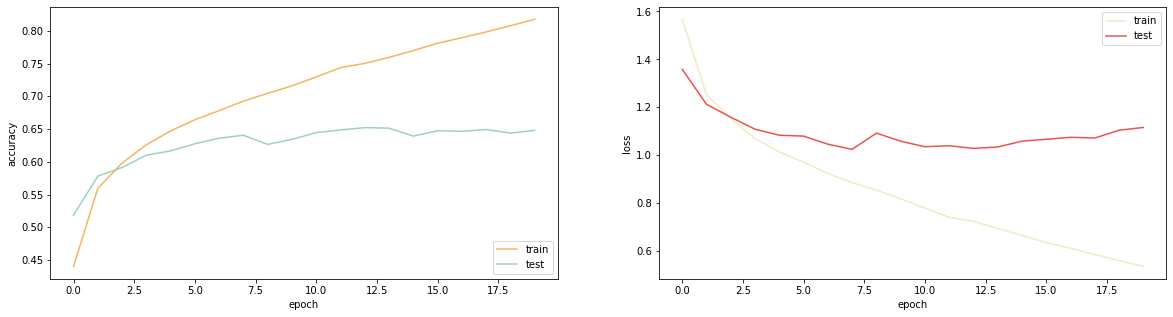

In [26]:
modelPlots(historyCIFAR)

È possibile osservare che il modello presenta chiaramente segni di overfitting e poiché la sua accuratezza sul validation set non è elevata come sul test set. Si potrebbe provare ad utilizzare tecniche di regolarizzazione per cercare di limitare questo fenomeno.

In [27]:
yc_pred = modelCIFAR.predict(x_test)
y_pred = np.argmax(yc_pred, axis=1)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1000
           1       0.79      0.74      0.76      1000
           2       0.56      0.47      0.51      1000
           3       0.47      0.45      0.46      1000
           4       0.59      0.59      0.59      1000
           5       0.54      0.59      0.56      1000
           6       0.62      0.81      0.70      1000
           7       0.73      0.71      0.72      1000
           8       0.82      0.70      0.76      1000
           9       0.79      0.67      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



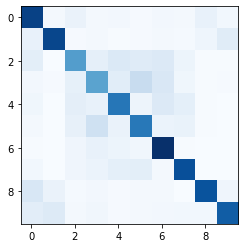

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues); plt.show()